In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import warnings
# filter warnings
warnings.filterwarnings('ignore')
%matplotlib inline
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
data = pd.read_csv('../input/digit-recognizer/train.csv')
test = pd.read_csv('../input/digit-recognizer/test.csv')

In [ ]:
data.columns

In [ ]:
# data.shape
print(test.shape)
print(data.shape)

In [ ]:
X_train = data.drop(labels = ["label"],axis = 1)
y_train = data['label']

In [ ]:
y_train.shape

In [ ]:
plt.figure(figsize = (14,5))
sns.countplot(y_train,palette = "hls")
plt.title("Numbers in each class")

In [ ]:
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train,num_classes = 10)

We have to reshape the input data to be in a 4D dimention (the size , height , width , depth ) 

In [ ]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [ ]:
X_train.shape

In [ ]:
test.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
plt.imshow(X_train[6][:,:,0],cmap='gray')
plt.show()

Back in 1959 two scientists have done some experiments on cats and later on monkeys.
They showed that many neurons in the visual cortex had a small receptive field meaning they react only to a local visual stimuli located in a limited region of the visual field

![ convolutional neural network ](https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg) ![]()

These studies on the visual cortex inspired neocognition which evolved to what we call now Convolutional neural network 

in CNN not every neuron in the convolution layer is connected to every neuron in the input layer like in the ANNs but connected only to those in the receptive fields 

**Convolution **
* we have an input image 
* we need something to detect features from the image (vertical edges, horizontal edges) -> filter
* filters are considered the weights of the network and it's a small image the size of the receptive field
* stride -> the number of pixels shifts in an input matrix
* pooling -> subsample the input image in order to reduce the complexity


# Stride
Stride controls how the filter convolves around the input volume. In the example we had in part 1, the filter convolves around the input volume by shifting one unit at a time. The amount by which the filter shifts is the stride. ... Stride is normally set in a way so that the output volume is an integer and not a fraction

![ stride ](https://1.bp.blogspot.com/-xzQJ7bxlCUk/XkrIwV-mHRI/AAAAAAAAAqg/CKNuwo6V01EeTMDrNwD9g-3sqYbwur0gwCLcBGAsYHQ/s1600/appendix_C_eg_1.png) ![]()

 # Pooling
 pooling is used to subsample the input image in order to reduce the computational load,memory requirments and the model parameters (reduce the probability of overfitting)

![ pooling ](https://miro.medium.com/max/847/1*FHPUtGrVP6fRmVHDn3A7Rw.png) ![]()

# some notaions
* f-> filter
* s -> stride
* n -> the shape of the input matrix 
* p -> pading
* nH = the new input shape
* nH = (n+2p-f+1)/s

when we apply conv layers the shape of the output matrix is reduced, so if we want to preserve the shape of the matrix we use pading

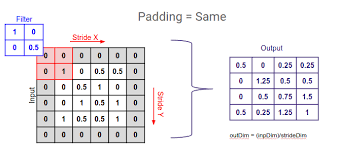 ![]()

# Memory Requirements
CNN require a huge amount of memory, especially during training Because it needs to store all the intermediate values for backpropagation

# Flattening
After finishing convolving and padding we need to flatten the new pooled feature map, the reason we do this bacause we are going to insert it in an artificial neural network

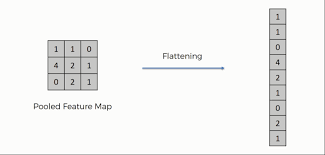 ![]()

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
# from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 8 ,kernel_size = (5,5),padding = "Same",activation = 'relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 16 ,kernel_size=(3,3),padding = "Same",activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation = 'softmax'))

Optimizer = tf.keras.optimizers.Adam(lr = 0.001,beta_1=0.9, beta_2=0.999)

model.compile(optimizer = Optimizer ,loss = "categorical_crossentropy", metrics=["accuracy"])

# loss fuction
Categorical cross entropy 
it's used for muticlass classifications
it is designed to quantify the difference between two probability distributions

![ categorical cross entropy](http://androidkt.com/wp-content/uploads/2021/05/Selection_099-1024x200.png) ![]()

# Data Augmentation

Sometimes there isn't enough data to train the model,that may cause overfitting.there is a technique called data augmentation that allows us to expand our dataset by inserting newly transformed version of the images in the original dataset.or the model doesn't identify some differences of the same image.  
ex: the number 4 might be rotated by 10 degrees.
the CNN won't do will

You can apply any random transformations on each training image as it is passed to the model. This will not only make your model robust but will also save up on the overhead memory

![Data Augmentation](https://miro.medium.com/max/1200/1*MUOrB2-H5qkJop3Kl2oYmQ.png) ![]()

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 5,
    width_shift_range = 0.2 , height_shift_range = 0.2,
    horizontal_flip = False , vertical_flip = False,
    zoom_range = 0.1,
    zca_whitening = False,
    featurewise_center=False, 
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    )
datagen.fit(X_train)


In [ ]:
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=250),
                              epochs = 10, validation_data = (X_test,y_test), steps_per_epoch=X_train.shape[0] // 250)

In [ ]:
plt.plot(history.history['val_loss'],color = 'r',label = 'val_loss')
plt.title('test loss')
plt.xlabel('number of epochs')
plt.ylabel('loss')
# plt.legend()
plt.show()

There are pretrained CNN architectures like LeNet-5 , Google-Net , ResNet

# Reference
Hands on Machine Learning with scikit-learn and tensorflow      
Andrew Ng's slides from the convolutional neural network course